In [1]:
from warnings import simplefilter
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
# from sklearn.feature_selection import SelectKBest 
# from sklearn.feature_selection import chi2
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn
import warnings
warnings.filterwarnings("ignore")    # 忽略警告

diabetes = pd.read_csv(r'F:\苏大学习\python作业\糖尿病预测模型\diabetes.csv')
diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
diabetes = diabetes.drop(diabetes[diabetes.Glucose==0].index)
diabetes = diabetes.drop(diabetes[diabetes.BloodPressure==0].index)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("dimension of diabetes data:{}".format(diabetes.shape))

dimension of diabetes data:(728, 9)


Outcome
0    478
1    250
dtype: int64


Text(0, 0.5, 'Count')

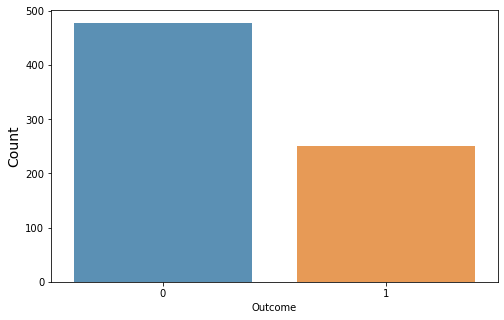

In [5]:
print(diabetes.groupby('Outcome').size())
plt.figure(figsize=(8,5)) 
sns.countplot(diabetes['Outcome'],alpha = 0.8)
plt.ylabel('Count',fontsize=14)


In [6]:
diabetes.info()     # 查看数据类型

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    int64  
 1   Glucose                   728 non-null    int64  
 2   BloodPressure             728 non-null    int64  
 3   SkinThickness             728 non-null    int64  
 4   Insulin                   728 non-null    int64  
 5   BMI                       728 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       728 non-null    int64  
 8   Outcome                   728 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 76.9 KB


In [7]:
x_diabetes = diabetes.iloc[:,0:8]    #前八列数据
y_diabetes = diabetes.loc[:,['Outcome']]    #最后一列数据
x_diabetes
y_diabetes

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_diabetes, y_diabetes, test_size = 0.2)
x_train
y_train

,Outcome
274,0
275,0
322,1
482,0
738,0
...,...
283,1
519,0
215,1
406,1


## 逻辑回归

In [9]:
lr = LogisticRegression()    # 调用逻辑回归模型
lr.fit(x_train, y_train)    # 使用训练集训练模型参数
score_lr_train = lr.score(x_train,y_train)
score_lr_test = lr.score(x_test, y_test)
print('逻辑回归模型在训练集上的准确率为：%.4f'% score_lr_train)
print('逻辑回归模型在测试集上的准确率为：%.4f'% score_lr_test)

逻辑回归模型在训练集上的准确率为：0.7784
逻辑回归模型在测试集上的准确率为：0.8014


## k近邻算法

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
score_knn_train = knn.score(x_train, y_train)
score_knn_test = knn.score(x_test, y_test)
print('knn算法在训练集上的准确率为：%.4f'% score_lr_train)
print('knn算法在测试集上的准确率为：%.4f'% score_lr_test)

knn算法在训练集上的准确率为：0.7784
knn算法在测试集上的准确率为：0.8014


## 高斯朴素贝叶斯

In [11]:
gau = GaussianNB()
gau.fit(x_train, y_train)
score_gau_train = gau.score(x_train, y_train)
score_gau_test = gau.score(x_test, y_test)
print('GaussianNB在训练集上的准确率为：%.4f'% score_gau_train)
print('GaussianNB在测试集上的准确率为：%.4f'% score_gau_test)

GaussianNB在训练集上的准确率为：0.7663
GaussianNB在测试集上的准确率为：0.7329


## 决策树模型

In [12]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
score_clf_train = clf.score(x_train, y_train)
score_clf_test = clf.score(x_test, y_test)
print('决策树模型在训练集上的准确率为：%.4f'% score_clf_train)
print('决策树模型在测试集上的准确率为：%.4f'% score_clf_test)

决策树模型在训练集上的准确率为：1.0000
决策树模型在测试集上的准确率为：0.7192


## 支持向量机

In [13]:
svc = SVC(C = 1)    # 参数C表示对误差的容忍度，C过小容易欠拟合，过大容易过拟合
svc.fit(x_train, y_train)
score_svc_train = svc.score(x_train, y_train)
score_svc_test = svc.score(x_test, y_test)
print('支持向量机模型在训练集上的准确率为：%.4f'% score_svc_train)
print('支持向量机模型在测试集上的准确率为：%.4f'% score_svc_test)

支持向量机模型在训练集上的准确率为：0.7715
支持向量机模型在测试集上的准确率为：0.7260


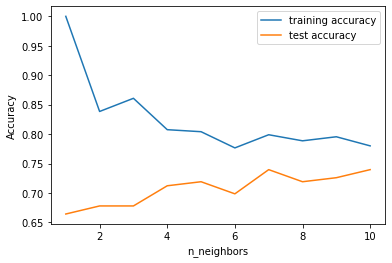

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)    #build the models
    knn.fit(x_train, y_train)    # use x_train as train data and y_train as target value
    training_accuracy.append(knn.score(x_train, y_train))    # record training set accuracy
    test_accuracy.append(knn.score(x_test, y_test))    # record test set accuracy

'''
The relationship between the training set and the test set on the model prediction
accuracy (Y-axis) and the number of nearest neighbors (X-axis) is demonstrated
'''
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [15]:
# select n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.73
